In [1]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt

In [9]:
# -------------------------------- local Green's function ----------------------------------------------
path = 'C:/Users/pworm/Research/BEPS_Project/HoleDoping/2DSquare_U8_tp-0.25_tpp0.12_beta12.5_n0.85/'
beta = 50.0
U    = 2.0
n    = 0.85
mu   = 0.450528974361868
giw = np.loadtxt(path + "gm_wim")
giw = giw[:,1] + 1j * giw[:,2]
g0mand = np.loadtxt(path + "g0mand")
g0mand = g0mand[:,1] + 1j * g0mand[:,2]
siw =  g0mand - giw ** (-1.0)
siw = np.concatenate((np.flip(np.conj(siw)),siw))
giw = np.concatenate((np.flip(np.conj(giw)),giw))
Niv1 = np.size(giw) // 2
print(Niv1)
#f.close()
f = h5py.File(path + '1p-data.hdf5','w')
f['/dmft-last/ineq-001/giw/value'] = giw[None,None,:] * np.ones((1,2,1))
f['/dmft-last/ineq-001/siw/value'] = siw[None,None,:] * np.ones((1,2,1))
f.create_group('/.config')
f['.config'].attrs['general.beta'] = beta
f['.config'].attrs['atoms.1.udd']   = U
f['.config'].attrs['general.totdens']  = n
f['dmft-last/mu/value']            = mu
f.close()

65536


(0.0, 20.0)

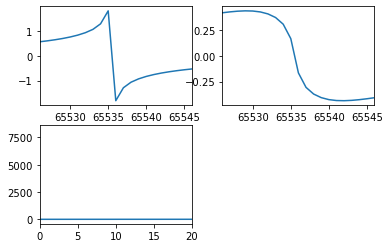

In [10]:
plt.subplot(221)
plt.plot(giw.imag)
plt.xlim(Niv1-10,Niv1+10)
plt.subplot(222)
plt.plot(siw.imag)
plt.xlim(Niv1-10,Niv1+10)
plt.subplot(223)
plt.plot(g0mand.imag)
plt.xlim(0,20)

In [11]:
Nw = 59
Nv = 60
iw = 59
iwb = (np.arange(-Nw,Nw+1))
F_DM = np.loadtxt(path + 'F_DM')
# This is F/beta^2
f_d = F_DM[:,3].reshape((2*Nw+1,2*Nv,2*Nv)) + 1j * F_DM[:,4].reshape((2*Nw+1,2*Nv,2*Nv))
f_m = F_DM[:,5].reshape((2*Nw+1,2*Nv,2*Nv)) + 1j * F_DM[:,6].reshape((2*Nw+1,2*Nv,2*Nv))
f_d = np.flip(f_d, axis = 0)
f_m = np.flip(f_m, axis = 0)

(50.0, 70.0)

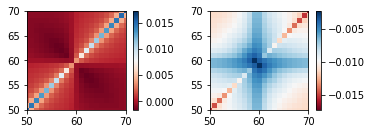

In [12]:
plt.subplot(221)
plt.imshow(f_d[iw,:,:].real, cmap = 'RdBu', origin='lower')
plt.colorbar()
plt.xlim(Nv-10,Nv+10)
plt.ylim(Nv-10,Nv+10)

plt.subplot(222)
plt.imshow(f_m[iw,:,:].real, cmap = 'RdBu', origin='lower')
plt.colorbar()
plt.xlim(Nv-10,Nv+10)
plt.ylim(Nv-10,Nv+10)

In [13]:
# ----------------------------- local two-particle Green's function -----------------------------------
f.close()
f = h5py.File(path + 'g4iw_sym.hdf5','w')
chig_0 = np.zeros((2*Nw+1, 2 * Nv, 2 * Nv), dtype = complex)
chig_d = np.zeros((2*Nw+1, 2 * Nv, 2 * Nv), dtype = complex)
chig_m = np.zeros((2*Nw+1, 2 * Nv, 2 * Nv), dtype = complex)
iwb = (np.arange(-Nw,Nw+1))
f['/.axes/iwb-g4'] = iwb * 2
f['/.axes/iwf-g4'] = (np.arange(-Nv,Nv))
for iw in range(2*Nw+1):
    print(iw)
    chig_0[iw,:,:] = - np.diag(giw[Niv1-Nv:Niv1+Nv] * giw[Niv1-Nv-iwb[iw]:Niv1+Nv-iwb[iw]])
    chig_d[iw,:,:] = chig_0[iw,:,:]  - beta * chig_0[iw,:,:]  @ f_d[iw,:,:] @ chig_0[iw,:,:]
    chig_m[iw,:,:] = chig_0[iw,:,:]  - beta * chig_0[iw,:,:]  @ f_m[iw,:,:] @ chig_0[iw,:,:]
    if(iw == Nw):
        f['/ineq-001/dens/{:05}/00001/value'.format(iw)] = chig_d[iw,:,:] + 2.0 * giw[Niv1-Nv:Niv1+Nv,None] * giw[None,Niv1-Nv:Niv1+Nv]
    else:
        f['/ineq-001/dens/{:05}/00001/value'.format(iw)] = chig_d[iw,:,:]
    f['/ineq-001/magn/{:05}/00001/value'.format(iw)] = chig_m[iw,:,:]
f.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


(50.0, 70.0)

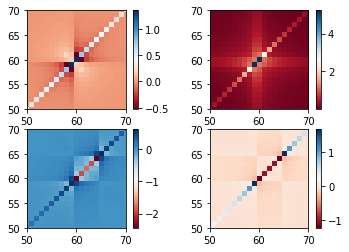

In [14]:
iw0 = Nw
plt.subplot(221)
plt.imshow(chig_d[iw0,:,:].real, cmap = 'RdBu', origin='lower')
plt.colorbar()
plt.xlim(Nv-10,Nv+10)
plt.ylim(Nv-10,Nv+10)

plt.subplot(222)
plt.imshow(chig_m[iw0,:,:].real, cmap = 'RdBu', origin='lower')
plt.colorbar()
plt.xlim(Nv-10,Nv+10)
plt.ylim(Nv-10,Nv+10)

plt.subplot(223)
plt.imshow(chig_d[iw0+5,:,:].real, cmap = 'RdBu', origin='lower')
plt.colorbar()
plt.xlim(Nv-10,Nv+10)
plt.ylim(Nv-10,Nv+10)

plt.subplot(224)
plt.imshow(chig_m[iw0+5,:,:].real, cmap = 'RdBu', origin='lower')
plt.colorbar()
plt.xlim(Nv-10,Nv+10)
plt.ylim(Nv-10,Nv+10)